In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Plotting a time series (I)

### In this exercise, you'll practice plotting the values of two time series without the time component.

### Two DataFrames, data and data2 are available in your workspace.

### Unless otherwise noted, assume that all required packages are loaded with their common aliases throughout this course.

### Note: This course assumes some familiarity with time series data, as well as how to use them in data analytics pipelines. For an introduction to time series, we recommend the Introduction to Time Series Analysis in Python and Visualizing Time Series Data with Python courses.

### Instructions 1/3
-    Print the first five rows of data.

In [52]:
df = pd.read_csv("data/prices.csv")

data = df[df["symbol"].isin(["AAPL"])].pivot(columns="symbol", values="close", index="date")
data = pd.DataFrame({"data_values": data["AAPL"].values})

## I'm not sure what data2 they were looking at, I think it was one of the audio files, but this works for me
data2 = df[df["symbol"].isin(["EBAY"])].pivot(columns="symbol", values="close", index="date")
data2 = pd.DataFrame({"data_values": data2["EBAY"].values})

In [53]:
# Print the first 5 rows of data
print(data.head())

   data_values
0   214.009998
1   214.379993
2   210.969995
3   210.580000
4   211.980005


### Instructions 2/3
-    Print the first five rows of data2.

In [54]:
# Print the first 5 rows of data2
print(data2.head())

   data_values
0    23.900000
1    23.650000
2    23.500000
3    23.229998
4    23.509999


### Instructions 3/3
-    Plot the values column of both the data sets on top of one another, one per axis object.

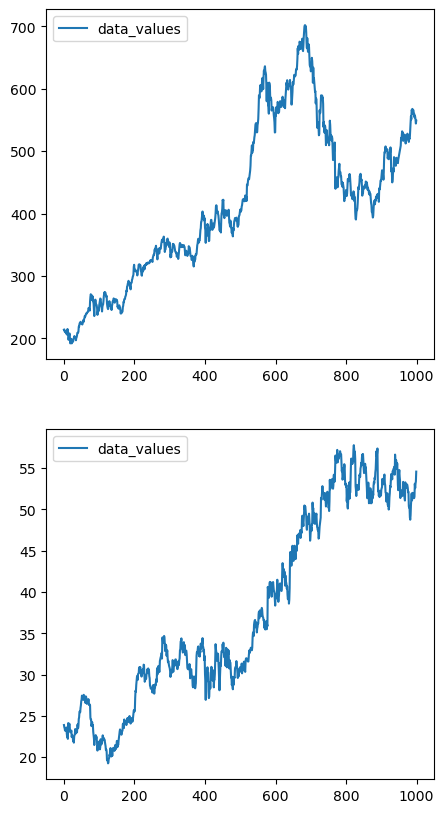

In [55]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(y="data_values", ax=axs[0])
data2.iloc[:1000].plot(y="data_values", ax=axs[1])
plt.show()

## Plotting a time series (II)

### You'll now plot both the datasets again, but with the included time stamps for each (stored in the column called "time"). Let's see if this gives you some more context for understanding each time series data.

### Instructions
-    Plot data and data2 on top of one another, one per axis object.
-    The x-axis should represent the time stamps and the y-axis should represent the dataset values.

In [69]:
df["time"] = df["date"]
data = df[df["symbol"].isin(["AAPL"])].pivot(columns="symbol", values="close", index="time")
data = data.reset_index()
data["data_values"] = data["AAPL"]

## I'm not sure what data2 they were looking at, I think it was one of the audio files, but this works for me
data2 = df[df["symbol"].isin(["EBAY"])].pivot(columns="symbol", values="close", index="time")
data2 = data2.reset_index()
data2["data_values"] = data2["EBAY"]

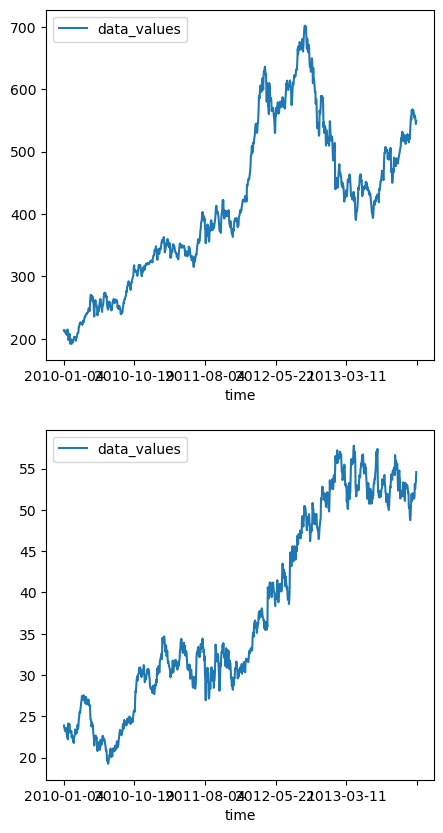

In [70]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(x="time", y="data_values", ax=axs[0])
data2.iloc[:1000].plot(x="time", y="data_values", ax=axs[1])
plt.show()

## Fitting a simple model: classification

### In this exercise, you'll use the iris dataset (representing petal characteristics of a number of flowers) to practice using the scikit-learn API to fit a classification model. You can see a sample plot of the data to the right.

### Note: This course assumes some familiarity with Machine Learning and scikit-learn. For an introduction to scikit-learn, we recommend the Supervised Learning with Scikit-Learn and Preprocessing for Machine Learning in Python courses.

### Instructions 1/2
-    Print the first five rows of data.

In [36]:
import pandas as pd
from sklearn import datasets

iris_data = datasets.load_iris()
data = pd.DataFrame(data = iris_data['data'], columns = iris_data['feature_names'])
data["target"] = iris_data['target']

targets = data[:200]

In [37]:
# Print the first 5 rows for inspection
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


### Instructions 2/2
-    Extract the "petal length (cm)" and "petal width (cm)" columns of data and assign it to X.
-    Fit a model on X and y.

In [38]:
from sklearn.svm import LinearSVC

# Construct data for the model
X = data[["petal length (cm)", "petal width (cm)"]]
y = data[['target']]

# Fit the model
model = LinearSVC()
model.fit(X, y)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC()

## Predicting using a classification model

### Now that you have fit your classifier, let's use it to predict the type of flower (or class) for some newly-collected flowers.

### Information about petal width and length for several new flowers is stored in the variable targets. Using the classifier you fit, you'll predict the type of each flower.

### Instructions
-    Predict the flower type using the array X_predict.
-    Run the given code to visualize the predictions.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


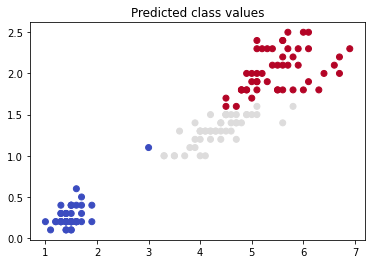

In [39]:
# Create input array
X_predict = targets[['petal length (cm)', 'petal width (cm)']]

# Predict with the model
predictions = model.predict(X_predict)
print(predictions)

# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show()

## Fitting a simple model: regression

### In this exercise, you'll practice fitting a regression model using data from the California housing market. A DataFrame called housing is available in your workspace. It contains many variables of data (stored as columns). Can you find a relationship between the following two variables?

-    "MedHouseVal": the median house value for California districts (in $100,000s of dollars)
-    "AveRooms" : average number of rooms per dwelling

### Instructions
-    Prepare X and y DataFrames using the data in housing.
-    -    X should be the Median House Value, y average number of rooms per dwelling. 
-    Fit a regression model that uses these variables (remember to shape the variables correctly!).
-    Don't forget that each variable must be the correct shape for scikit-learn to use it!

In [43]:
housing_raw = datasets.fetch_california_housing()
housing = pd.DataFrame(data = housing_raw['data'], columns = housing_raw['feature_names'])
housing["MedHouseVal"] = housing_raw['target']

In [45]:
from sklearn import linear_model

# Prepare input and output DataFrames
X = housing[["MedHouseVal"]]
y = housing[["AveRooms"]]

# Fit the model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

## Predicting using a regression model

### Now that you've fit a model with the California housing data, lets see what predictions it generates on some new data. You can investigate the underlying relationship that the model has found between inputs and outputs by feeding in a range of numbers as inputs and seeing what the model predicts for each input.

### A 1-D array new_inputs consisting of 100 "new" values for "MedHouseVal" (median house value) is available in your workspace along with the model you fit in the previous exercise.

### Instructions
-    Review new_inputs in the shell.
-    Reshape new_inputs appropriately to generate predictions.
-    Run the given code to visualize the predictions.

In [51]:
import numpy as np
new_inputs = np.array([0.14999   , 0.1989801 , 0.2479702 , 0.2969603 , 0.3459504 , 0.39494051, 0.44393061, 0.49292071, 0.54191081, 0.59090091,
       0.63989101, 0.68888111, 0.73787121, 0.78686131, 0.83585141, 0.88484152, 0.93383162, 0.98282172, 1.03181182, 1.08080192,
       1.12979202, 1.17878212, 1.22777222, 1.27676232, 1.32575242, 1.37474253, 1.42373263, 1.47272273, 1.52171283, 1.57070293,
       1.61969303, 1.66868313, 1.71767323, 1.76666333, 1.81565343, 1.86464354, 1.91363364, 1.96262374, 2.01161384, 2.06060394,
       2.10959404, 2.15858414, 2.20757424, 2.25656434, 2.30555444, 2.35454455, 2.40353465, 2.45252475, 2.50151485, 2.55050495,
       2.59949505, 2.64848515, 2.69747525, 2.74646535, 2.79545545, 2.84444556, 2.89343566, 2.94242576, 2.99141586, 3.04040596,
       3.08939606, 3.13838616, 3.18737626, 3.23636636, 3.28535646, 3.33434657, 3.38333667, 3.43232677, 3.48131687, 3.53030697,
       3.57929707, 3.62828717, 3.67727727, 3.72626737, 3.77525747, 3.82424758, 3.87323768, 3.92222778, 3.97121788, 4.02020798,
       4.06919808, 4.11818818, 4.16717828, 4.21616838, 4.26515848, 4.31414859, 4.36313869, 4.41212879, 4.46111889, 4.51010899,
       4.55909909, 4.60808919, 4.65707929, 4.70606939, 4.75505949, 4.8040496 , 4.8530397 , 4.9020298 , 4.9510199 , 5.00001   ])

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


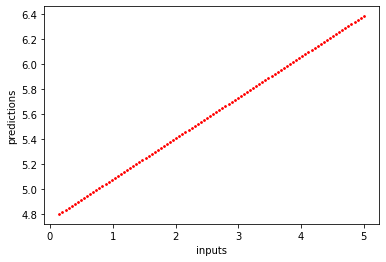

In [52]:
# Generate predictions with the model using those inputs
predictions = model.predict(new_inputs.reshape(-1, 1))

# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()

## Inspecting the classification data

### In these final exercises of this chapter, you'll explore the two datasets you'll use in this course.

### The first is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat abnormally. This dataset contains a training set with labels for each type of heartbeat, and a testing set with no labels. You'll use the testing set to validate your models.

### As you have labeled data, this dataset is ideal for classification. In fact, it was originally offered as a part of a public Kaggle competition.

### Instructions
-    Use glob to return a list of the .wav files in data_dir directory.
-    Import the first audio file in the list using librosa.
-    Generate a time array for the data.
-    Plot the waveform for this file, along with the time array.

In [57]:
#!pip install librosa, glob
data_dir = './files'

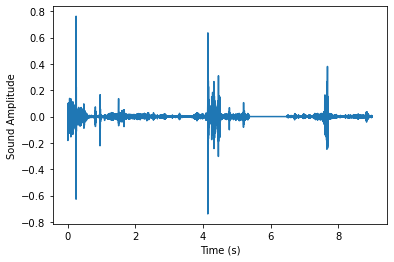

In [59]:
import librosa as lr
from glob import glob

# List all the wav files in the folder
audio_files = glob(data_dir + '/*.wav')

# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

## Inspecting the regression data

### The next dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If you can model the value of a company as it changes over time, you can make predictions about where that company will be in the future. This dataset was also originally provided as part of a public Kaggle competition.

### In this exercise, you'll plot the time series for a number of companies to get an understanding of how they are (or aren't) related to one another.

### Instructions
-    Import the data with Pandas (stored in the file 'prices.csv').
-    Convert the index of data to datetime.
-    Loop through each column of data and plot the the column's values over time.

In [20]:
df = pd.read_csv('data/prices.csv', index_col=0)
df["date"] = pd.to_datetime(df.index, format="%Y-%m-%d")

data = df[df["symbol"].isin(["AAPL", "FB", "NFLX", "V", "XOM"])].pivot(columns="symbol", values="close", index="date")

symbol            AAPL  FB       NFLX          V        XOM
date                                                       
2010-01-04  214.009998 NaN  53.479999  88.139999  69.150002
2010-01-05  214.379993 NaN  51.510001  87.129997  69.419998
2010-01-06  210.969995 NaN  53.319999  85.959999  70.019997
2010-01-07  210.580000 NaN  52.400001  86.760002  69.800003
2010-01-08  211.980005 NaN  53.300002  87.000000  69.519997


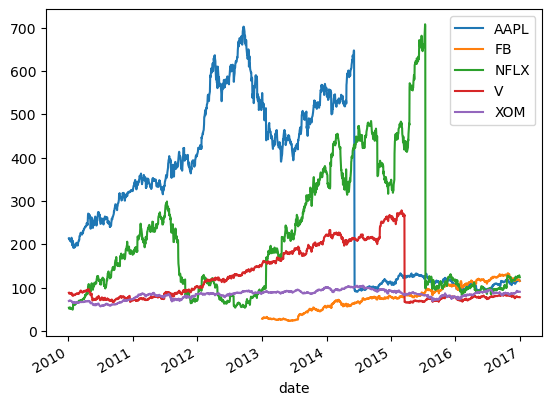

In [21]:
# Read in the data
#data = pd.read_csv('data/prices.csv', index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())

# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in data.columns:
    data[column].plot(ax=ax, label=column)
ax.legend()
plt.show()